# Must-read Guide to Hypothesis Tests You Will Never Use
## Theory + Code ## TODO
<img src='images/cotton.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@cottonbro?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Cottonbro</a>
        on 
        <a href='https://www.pexels.com/photo/persons-hand-on-black-typewriter-6143834/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')
plt.style.use('ggplot')

### Demotivation

Let me get your hopes down right from the beginning. You won't be using the concepts learnt from this article until you get  a  job in data science. You may practice it a few times on public datasets and that's probably it. 

Then, why learn them? Well, I don't want to you to be like a new-hatched bird thrown from the Everest when you *do* get a real job. So, what are we talking about here? 

We are talking about the icing on the cake🎂, the thing that concludes any data related projects in business and scientific research - **hypothesis testing**. It tests the results of surveys or experiments to see if they happened by chance or are actually meaningful and significant.

For example, a medical team might assess the effectiveness of a new drug💊 by giving it to two different test groups and comparing for different metrics like recovery time, side effects, etc. There is an important reason why the results are not accepted "as is". 

Any data collected for a survey or research is only a sample of the group of interest (also called the population). Medical teams can only test a new drug on a few hundred patients. Because it is impossible to test it on the whole population of patients diagnosed with a particular illness. Obviously, doctors have to make sure that a new drug works on everyone not just on the small subset a single hospital. 

In statistical terms, this is the same as making predictions for population parameters by looking at sample statistics. In other words, making sure that the results are not too specific to the small sample obtained but applies to a wide range of individuals. 

Generally, hypothesis tests combines many concepts of statistics and probability such as conditional probability, probability distributions, confidence intervals and so on. I am not trying to scare you with fancy terms but it generally takes a while to wrap your head around hypothesis testing. So, in this article  we will only focus on theory with intuitive examples and I will leave a link to a good source to implement the theory in code. 

### Real-World Example

Honestly, it took me a long time to put the pieces together but the resource that made everything click for me was Khan Academy's hypothesis testing playlist. So, to give you the initial idea, I will use one of the examples from there. Let's begin!

There are 4 brothers in the family: Jon, Bruce, Harry, and Bob. They decide that to find out who does the dishes every day, their eldest brother, Jon, randomly draws a name from a bag. 

For four nights in a row, Jon does not get selected so Bruce starts to get suspicious. He hypothesizes that Jon is cheating but to make sure, he decides to wait a few days longer. On the tenth day, Jon still doesn't get picked. Then, Bruce thinks that Jon is definitely cheating and wants to test this hypothesis with his probability skills. 

To be safe, he starts with the assumption that Jon is innocent but if the probability turns out to be less 20%, he can safely tell his parents that Jon is cheating. 

Given that everyone has an equal chance of getting picked which is 25% on any day, the probability of not getting selected is 75%:

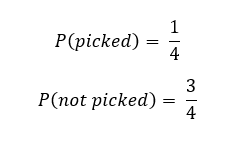

Bruce calculates the probability of not getting picked for 10 days with joint probability:

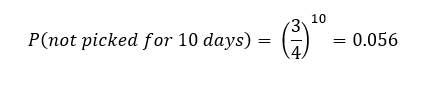

The result is about 6% or, in other words, this particular event happens 6 times every 1000 days (do the math to check). The result is lower than Bruce's suspicion level, so he can tell his parents that Jon was cheating.

In real life, all hypothesis tests generally follow this pattern. First, two competing ideas are generated (1. Jon is innocent and 2. Jon is cheating). Then, using the sample data (observed results of 10 days of random picking) some test statistic is checked (in our case, probability) if it happened by chance or it is actually a new measurement. 

At this point, a question arises: How do we figure out if the result is random or a new measurement: that's where significance levels come into play. In the brothers' example, Bruce set a significance level of 20% and if his test turned out to be less than that, he rejected his hypothesis of Jon being innocent and concluded that he is cheating.

In business and research, this significance level is usually set to 5%. In medical fields, it is 1%. We will look at each step of hypothesis testing in detail in the coming sections.

### Hypothesis Tests Are For Population Parameters

In hypothesis testing, two terms are used extensively: population and sample. So, it is important you distinguish them:
- **Population**: refers to the whole group of interest. For example, all the subscribers of Towards Data Science, all trees in a forest, every individual in a country are all considered as one population group. 
- **Sample**: a subset of the population. For instance, the readers of this article is a tiny sample of TDS's subscribers which is the population. Also, patients with flu in a single hospital is a sample of the population of all patients diagnosed with flu on the planet. There can be infinitely many variation of samples from a single population.
- **Population parameter**: global statistics about the population. For example, a mean height or weight of all humans on the planet is considered a parameter. 
- **Sample statistic**: a value specific to a single sample. 

### Setting Up Hypotheses

The first step of hypothesis testing is to state the competing hypotheses beforehand. They should be opposite, non-overlapping hypotheses. As an excellent example, I will take the judicial system where each case starts with the hypotheses "Innocent, until proven guilty". 

In terminology, the competing hypotheses are called **Null** and **Alternative** hypotheses. Null hypothesis is something we believe without looking at any data or evidence. It can also be thought of as 'no difference or no effect' hypothesis. Above, everyone is considered to be innocent until evidence suggests otherwise. That's why Bruce also started with the assumption that his elder brother is innocent. Note that because of how it is set up, accepting the Null won't have any effect on decisions both in business or research. (Think about why)

As the name suggests, **Alternative Hypothesis** is the complete opposite of the Null. In practice, it is also the idea that we want to prove or achieve. Bruce wants to prove that his brother is cheating, so the Alternative is 'Jon is cheating'. In court, the Alternative is 'the charged individual is guilty'.

Moving on to notation, Null is notated as $H_{0}$ while alternative is $H_{1}$ or sometimes, $H_{a}$. For mathematical representation, the Null usually comes with some kind of 'equal' sign: $=, \leq, \geq$.  Alternative may involve these symbols: $<, >, \neq$

Let me explain the above with another example. A website is testing a new UI (user interface) design to check if it drives more traffic than the old one. The owner wants to check this by comparing the mean amount of traffic for a single month. 

Just like I said, the Null hypothesis is something we believe to be true before collecting any data. In this case, without trying out the new UI for a single month, our Null will be "The mean traffic from the old design is as good or better than the new design". And we want to prove or achieve a greater traffic from the new UI so the Alternative will be: "The mean traffic of new UI is greater than the mean of the old UI". In notation, this will be:

$H_{0}: \mu_{old} \geq \mu_{new}$

$H_{1}: \mu_{old} < \mu_{new}$

For this case, we can have another set of hypotheses like mean is greater than sum value:

$H_{0}: \mu_{old} \leq 50$

$H_{1}: \mu_{new} > 50$

Here, we want to achieve a mean traffic greater than 70 so we start with the assumption that the traffic is either equal or lower than this value. 

Another set:

$H_{0}: \mu_{old} = 50$

$H_{1}: \mu_{old} \neq 50$

The last version is case-specific. For example, some medical tests need to have a certain accuracy score to be accepted by the government. Using the above formula, we can formulate a relevant hypothesis to check that.

### Types of Errors

No experiment or survey is error-free, including hypothesis testing. Typically, there are two types of errors in hypothesis tests: Type I and Type II. 

**Type I errors** occur when you accept the Alternative when actually the Null is true. This is considered as the worst type of error and I will explain why in a bit.

**Type II errors** are committed when you accept the Null when actually the Alternative is true. Their consequences are not as severe as Type I errors.

Continuing with the court example:

$H_{0}: Innocent$

$H_{1}: Guilty$

if the jury decides to avoid making any Type II errors, he will be charging everyone as guilty including all people who are innocent. This means he will be committing many serious Type I errors. On the other hand, if he tries to avoid Type I errors at all costs, everyone will be set free including criminals. This leads to many Type II errors being committed. 

Because of this relationship, professionals often set a threshold for the number of Type I errors while trying to avoid as many Type II errors as possible. And this threshold really depends on your use case. In business and research, it is usually set to 0.05 meaning people are willing to commit five Type I errors out of every hundred. In medical fields, the threshold is usually 0.01.

However, there are cases where any number of Type I errors is unacceptable. Let me give you an example which puts everything in perspective:

Suppose your job is to check if a parachute bag opens or not. You want all the bags to be working without fault, so you set up these hypothesis for each item:

$H_{0}: Defective$

$H_{1}: Working$

Here, any threshold for Type I errors is completely unacceptable. Because any Type I error, no matter how rare, means an imminent death of a skydiver, a real person. 

Note that the entire idea of errors depends on how you set up your initial hypotheses. Then, it is crucial you clearly define what Type I and Type II errors are. Usually, drawing up a grid like this helps:

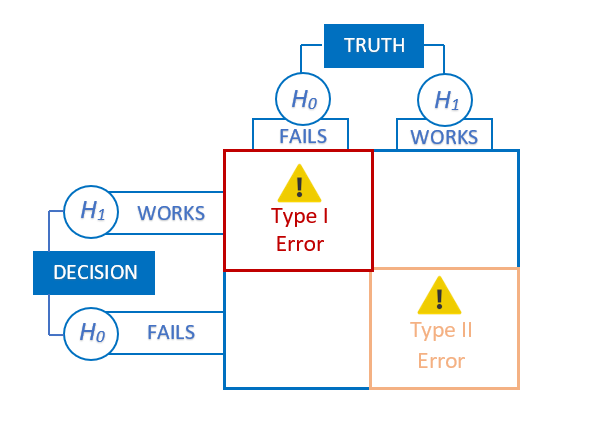
<figcaption style="text-align: center;">
    <strong>
        Image by author
    </strong>
</figcaption>

And BTW, the threshold for Type I errors is notated as Greek letter alpha $\alpha$ and also called a *false positive*. Similarly, Type II error rate is denoted as $\beta$ and called a *false negative*. Later, we will see another use case for $\alpha$ rate.

### Hypothesis Testing Pipeline

So far, he have talked about the first two steps of hypothesis tests:
- setting up the null and alternative
- identify error types and set a significance threshold

Now, we will look at a simple scenario using Python code. 

Here, we have the `tips` dataset from Seaborn which contains 244 records of clients coming to a restaurant. The dataset records bill and tip amount, table size and other details. For simplicity, imagine you are the owner of the restaurant and the dataset holds the information for a single workday:

In [18]:
tips = sns.load_dataset('tips').dropna().drop('day', axis=1)
tips.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,Female,No,Dinner,2
1,10.34,1.66,Male,No,Dinner,3
2,21.01,3.50,Male,No,Dinner,3
3,23.68,3.31,Male,No,Dinner,2
4,24.59,3.61,Female,No,Dinner,4


> All libraries are imported with their standard aliases.

You calculate the average income for this day by dividing the results into two groups, *dinner* and *lunch*:

In [19]:
tips.groupby('time')['total_bill'].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

Looks like on average, dinner-time clients paid more. Now, you wonder if this is just a random event specific to this day, or does this mean that you have to allocate more resources for dinner time from now on? Let's check this using a hypothesis test.

Since we want to prove that dinner-time clients pay more, it will be the alternative:

$H_{0}: \mu_{lunch} \geq \mu_{dinner}$

$H_{1}: \mu_{lunch} < \mu_{dinner}$

Note that $\mu$ represents the population mean which is the average income for different day times for all future days of the restaurant. 

Performing this type of hypothesis test is called two-sample test because we have two samples: for lunchtime and dinnertime. So, you will often see the null and alternative of two samples tests stated like this:

$H_{0}: \mu_{lunch} - \mu_{dinner} \geq 0$

$H_{1}: \mu_{lunch} - \mu_{dinner} < 0$

After stating the relevant hypothesis, we set the alpha threshold. I think 5% is the best option. Next step in the pipeline is to simulate the data under the null. In our case, it would be bootstrapping the two samples many times and in each iteration, find the difference in means. In other words, we obtain a sampling distribution of the difference in means. If you are not familiar with sampling distributions or bootstrapping in general, consider reading [my humble introduction]() to the topics.

First, let's store the total bill amount of the two mealtimes in arrays:

In [24]:
lunch = tips.query('time == "Lunch"')['total_bill']
dinner = tips.query('time == "Dinner"')['total_bill']

In [25]:
tips.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,Female,No,Dinner,2
1,10.34,1.66,Male,No,Dinner,3
2,21.01,3.50,Male,No,Dinner,3
3,23.68,3.31,Male,No,Dinner,2
4,24.59,3.61,Female,No,Dinner,4


Just for information, here is the difference between their means:

In [27]:
dinner.mean() - lunch.mean()

3.628482620320856

Now, we bootstrap the two samples to find many differences in means:

In [28]:
# Create an empty array to store the means
diffs = np.empty(10000)

for i in range(10000):
    # Sample lunch
    bs_lunch = np.random.choice(lunch, size=len(lunch))
    # Sample dinner
    bs_dinner = np.random.choice(dinner, size=len(dinner))
    # Append the diff in means to diffs
    diffs[i] = bs_dinner.mean() - bs_lunch.mean()

Plotting the sampling distribution will reveal that it follows a normal distribution, as expected:

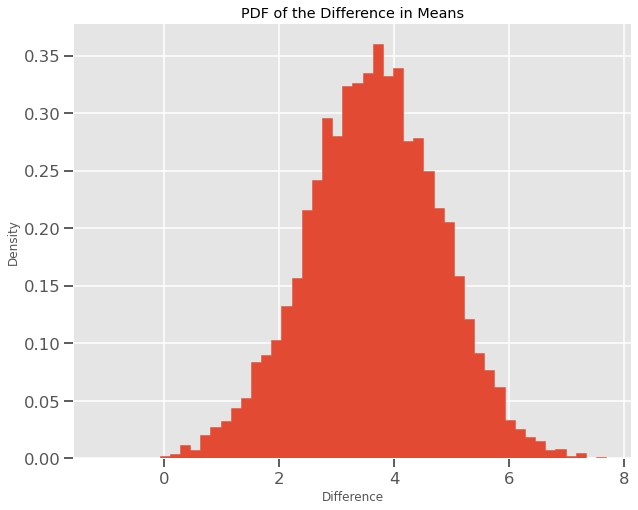

In [39]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(diffs, histtype='step', fill=True, bins=50, density=True)

# Labelling
ax.set(title='PDF of the Difference in Means',
       xlabel='Difference',
       ylabel='Density')

plt.show();

Now, to find out whether the null is true or not, we will find the proportion of values which are equal to or lower than 0. Because our null was this:

$H_{0}: \mu_{lunch} - \mu_{dinner} \geq 0$

This can be calculated with simple arithmetics:

In [40]:
np.sum(diffs <= 0) / len(diffs)

0.0003

This gives us 0.0003 probability of having a difference in mean greater lower than or equal to 0. What does this mean? Well, it means that we should reject the null. Because we said the mean income from lunchtime was the same or greater than dinnertime. And we simulated the data under this assumption and when we calculated the probability of that happening, we got 0.03% or 3 out of every 10000 days. 

Based on this, we reject the null and accept the alternative that dinnertime clients pay more on average than lunchtime clients.

This was a simple example of hypothesis tests. For your reference, I will leave out the full pipeline:
- Find out what you want to test clearly
- State relevant null and alternative hypotheses
- Set a significance level - alpha ($\alpha$)
- Simulate the data under the null for your test statistic (in our case, we used *mean*)
- Draw conclusions from the results

### p-values, true nightmare

Attentive readers might have noticed that I left out a key concept in the above example. I set the significance level but did not made any reference to it. There was an important reason behind this because significance levels often come together with *p-values*.

For many, understanding p-value (probability value) is the hardest part of hypothesis testing. But, if you were reading carefully, you kind of already know it. *What? How? When?*

Remember when we calculated the proportion of mean differences that were lower than or equal to 0? That proportion *IS* the p-value! In formal contexts, you will often see the definition of p-value like this:

> In null hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. (Well done, [Wikipedia]((https://en.wikipedia.org/wiki/P-value))!)

To this day, if I read it I go *blech*🤮! Here is a simple framing of the definition: 
> In a world where the null hypothesis is true, p-value tells the probability of observing the conditions that satisfy the null. Nothing more, nothing less.

Converting the definition for our restaurant case:

> In the world where we think lunchtime clients pay more or equally as dinnertime clients, the p-value tells the probability of having the mean differences between the two mealtimes that are lower than or equal to 0.

Let's go back to the brother's example and define what its p-value would give us: 
> In a world where Jon is innocent, the p-value gives the probability of Jon not being picked for 10 nights in a row.

To really hammer the point home, another more detailed example: you invented a new test to detect cancer. To be accepted by the government, it has to have over 99% accuracy. So, to check this you use a hypothesis test where the null and alternative are:

$H_{0}: accuracy \leq 99%$

$H_{1}: accuracy > 99%$

Since you want to have an accuracy over 99%, it goes to the alternative. In this case, p-value would tell you the probability of observing accuracy lower than 99% (I am not gonna say 'in a world') if we assume the test has accuracy lower than 99%.

Now, how do p-values relate to rejecting or accepting one hypothesis?  This is where we need significance levels. The general rule of thumb is that if p-value is lower than $\alpha$ (also significance level, Type I error threshold) we reject the null. If p-value is greater than or equal to alpha, nothing changes (we always start by accepting the null, remember?)

$p-value < \alpha \to Reject H_{0}$

$p-value \geq \alpha \to Fail \space to \space reject \space H_{0}$

You will also hear statisticians saying that if p-values is lower than $\alpha$ the results are *statistically significant*. Why?

Recall that we always start testing by accepting the null. Because the null was the hypothesis that introduced no 'news' or no effect. We accepted it without looking at any data or evidence. And in the end, if the p-value is lower than $\alpha$ we reject it and accept the alternative. In other words, having a low p-value suggests that we discovered something 'new', something that belongs to the alternative. That's why low p-value is associated with *statistical significance*.

Obviously, if p-value is higher than $\alpha$ we stay with the null and nothing changes, nothing *significant*.

### Statistical Significance vs Practical Significance, Dangers of Hypothesis Testing

Remember, hypothesis testing is all about providing businesses and professionals with a statistical tool to guide their decisions. However, a successful, statistically significant result is not always practically useful. 

For example, let's say you want to use a new UI for your website. So, you perform a hypothesis test between the old and the new designs. You reach a statistically significant result that suggests the click-though rate (CTR) performs 5% better than the old. Does this mean you immediately release the new UI for everyone? Not necessarily, because your new design costs much higher than the old. And the improved CTR is marginal. Practically, you would be better-off if you didn't change anything.

There are so many similar cases when performing hypothesis tests. Instead of jumping to action whenever you see a statistically significant result, consider the practical sides of your decision.

Besides, because of the amount of available data sample sizes are becoming bigger and bigger. This is a real problem because even a small increase in sample size can lead to statistically significant but unpractical results.

That's why more and more business are moving towards machine learning. ML algorithms try to predict possible outcomes for each unique data point. In contrast, hypothesis tests compare whole populations from a general perspective. For example, while a machine learning model predicts each individuals favorite ice-cream flavor, a hypothesis test tells if one flavor wins over the other. If you base business decisions on hypothesis tests you might ignore the whole population who likes chocolate flavor, not to mention the people who like other flavors you have not tested.

### Conclusion

Even though I might have burst your 'hypothesis testing' bubble, they are still worth learning. Here, we only touched on critical points and there is still much to learn. Especially, performing hypothesis tests with code require both theoretical understanding and strong coding skills. That's why I am leaving a few helpful links to other resources:

- Performing HTs with `SciPy`, found though [Kaggle](https://drive.google.com/file/d/1KiVyI7cXX6QQBVS7Kq7DrhMu1-bvtAbH/view).
- Hypothesis testing [playlist](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample) by Khan Academy.
- Hypothesis testing [article](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/) by StatisticsHowTo.
- [Article](https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a#:~:text=Using%20Hypothesis%20Testing%2C%20we%20try,supported%20by%20the%20sample%20data.) by Mahesh on Medium.

Thanks for reading!